## ⤵️ Imports

In [617]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

##⏳ Separação das bases (produção, treino e teste)

In [618]:
wine = pd.read_csv('/content/drive/MyDrive/2026/2026 01/5 -  Projeto de Bloco: Engenharia de Dados: Big Data/dataset_vinhos.csv', sep=';')

In [619]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target,target_label,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,baixa qualidade,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,baixa qualidade,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,baixa qualidade,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,alta qualidade,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,baixa qualidade,red


In [620]:
x_train, prod = train_test_split(wine, test_size=0.2, stratify=wine['target'])

train, test = train_test_split(x_train, test_size=0.2, stratify=x_train['target'])

In [621]:
print(train.shape)
print(test.shape)

(3404, 14)
(852, 14)


##💡 Seleção das features para o modelo

In [622]:
numeric_features = wine.drop(columns=['target_label', 'type'])
corr = numeric_features.corr()

In [623]:
corr['target']

,target
fixed acidity,-0.071957
volatile acidity,-0.269907
citric acid,0.087051
residual sugar,-0.047778
chlorides,-0.187385
free sulfur dioxide,0.046755
total sulfur dioxide,-0.049383
density,-0.287178
pH,0.036104
sulphates,0.035562


In [624]:
corr_columns = corr[(-0.2 >= corr['target']) | (corr['target'] >= 0.2)].index
corr_columns = corr_columns.drop('target')
corr_columns

Index(['volatile acidity', 'density', 'alcohol'], dtype='object')

## 📍 Escalonamento das variáveis

In [625]:
scaler = StandardScaler()

scaler = scaler.fit(train[corr_columns])

norm_train = scaler.transform(train[corr_columns])
norm_test = scaler.transform(test[corr_columns])
norm_prod = scaler.transform(prod[corr_columns])

## 💪🏼 Treinamento do modelo (KNN)

In [626]:
# weights
weights_list = [
  'uniform', 'distance'
]

In [627]:
results = []

for k in range(1, 16):
  for w in weights_list:

    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights=w,
        metric='minkowski'
    )
    knn = knn.fit(norm_train, train['target'])

    # Avaliar teste
    ytrain = knn.predict_proba(norm_train)[:,1]
    acc_train = accuracy_score(y_pred=ytrain > 0.5, y_true=train['target'])

    # Avaliar teste
    ytest = knn.predict_proba(norm_test)[:,1]
    acc_test = accuracy_score(y_pred=ytest > 0.5, y_true=test['target'])

    # Guardar resultados em dicionario
    results.append({
        'n_neighbors': k,
        'weights': w,
        'acc_train': acc_train,
        'acc_test': acc_test
    })

In [628]:
results = pd.DataFrame(results)

<Axes: xlabel='n_neighbors'>

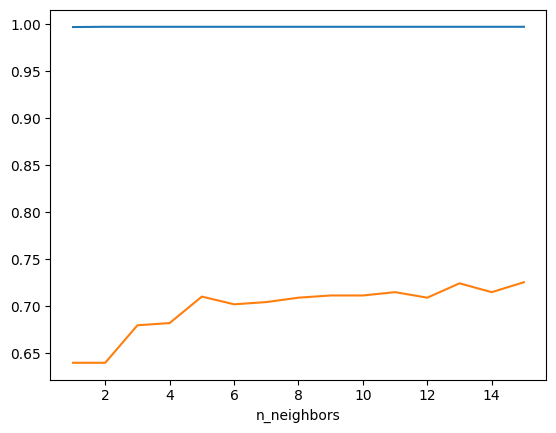

In [629]:
m = 'uniform'
results[results.weights == w].set_index('n_neighbors').acc_train.plot()
results[results.weights == w].set_index('n_neighbors').acc_test.plot()

<Axes: xlabel='n_neighbors'>

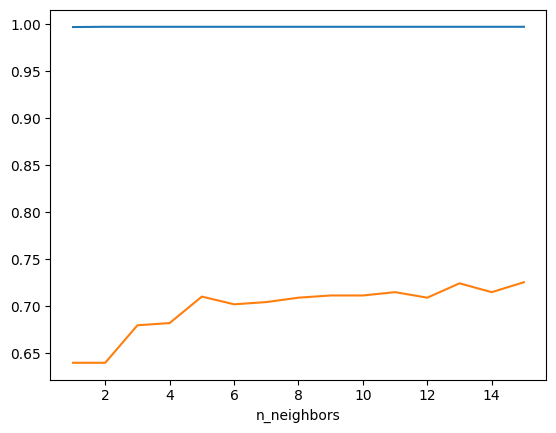

In [630]:
m = 'distance'
results[results.weights == w].set_index('n_neighbors').acc_train.plot()
results[results.weights == w].set_index('n_neighbors').acc_test.plot()

In [631]:
results = []

for k in range(1, 16):
  for w in weights_list:

    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights=w,
        metric='euclidean'
    )
    knn = knn.fit(norm_train, train['target'])

    # Avaliar teste
    ytrain = knn.predict_proba(norm_train)[:,1]
    acc_train = accuracy_score(y_pred=ytrain > 0.5, y_true=train['target'])

    # Avaliar teste
    ytest = knn.predict_proba(norm_test)[:,1]
    acc_test = accuracy_score(y_pred=ytest > 0.5, y_true=test['target'])

    # Guardar resultados em dicionario
    results.append({
        'n_neighbors': k,
        'weights': w,
        'acc_train': acc_train,
        'acc_test': acc_test
    })

In [632]:
results = pd.DataFrame(results)

<Axes: xlabel='n_neighbors'>

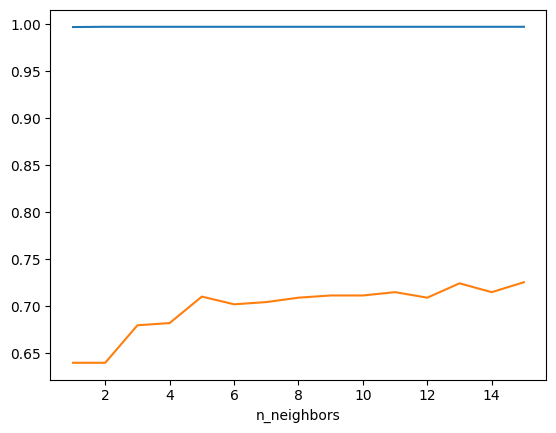

In [633]:
m = 'uniform'
results[results.weights == w].set_index('n_neighbors').acc_train.plot()
results[results.weights == w].set_index('n_neighbors').acc_test.plot()

<Axes: xlabel='n_neighbors'>

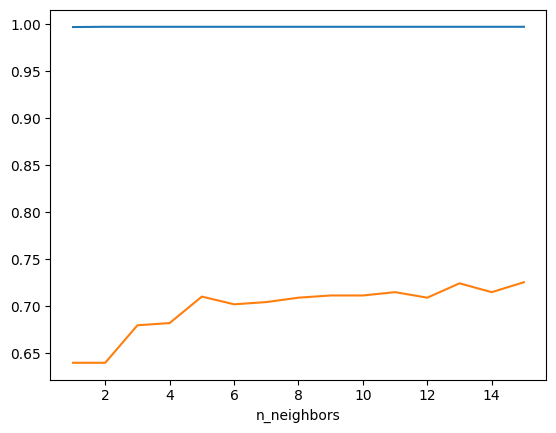

In [634]:
m = 'distance'
results[results.weights == w].set_index('n_neighbors').acc_train.plot()
results[results.weights == w].set_index('n_neighbors').acc_test.plot()